In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import re
warnings.filterwarnings("ignore")  

In [2]:
# Read the file
data = pd.read_csv('user-ct-test-collection-02.txt', sep='\t')

In [3]:
# show the data
data.head()

,AnonID,Query,QueryTime,ItemRank,ClickURL
0,479,family guy,2006-03-01 16:01:20,NaN,NaN
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN
2,479,family guy movie references,2006-03-03 22:37:46,1.0,http://www.familyguyfiles.com
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,http://movieweb.com
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,http://www.imdb.com


In [4]:
# Clean the URL
data['ClickURL'] = data['ClickURL'].str.strip(r'http://www.')

## Statics Summary of Data

In [5]:
total_len = len(data)
unique_query = data["Query"].nunique()
unique_users = data["AnonID"].nunique()
unique_urls = data["ClickURL"].nunique()

In [6]:
print("Total Number of Data/Query : ", total_len)
print("Total Unique Users : ", unique_users)
print("Total Unique Query : ", unique_query)
print("Total Unique URLs : ", unique_urls)

Total Number of Data/Query :  3614506
Total Unique Users :  66000
Total Unique Query :  1244495
Total Unique URLs :  382210


In [7]:
def timeOfDay(date):
    #dt = parse(date)
    if date.hour < 12:
        return "Morning"
    if date.hour>= 12 and date.hour <= 15:
        return "Afternoon"
    if date.hour> 15 and date.hour < 21:
        return "Evening"
    else:
        return "Night"

In [8]:
data['QueryDay'] = pd.to_datetime(data['QueryTime']).apply(lambda x: x.date())
data['QueryDate'] = pd.to_datetime(data['QueryTime']).apply(lambda x: x.date())
data['QueryTimeStamp'] = pd.to_datetime(data['QueryTime']).apply(lambda x: x.time())
data['TOD'] = data['QueryTimeStamp'].apply(lambda x: timeOfDay(x))

In [9]:
data.head()

,AnonID,Query,QueryTime,ItemRank,ClickURL,QueryDay,QueryDate,QueryTimeStamp,TOD
0,479,family guy,2006-03-01 16:01:20,NaN,NaN,2006-03-01,2006-03-01,16:01:20,Evening
1,479,also sprach zarathustra,2006-03-02 14:48:55,NaN,NaN,2006-03-02,2006-03-02,14:48:55,Afternoon
2,479,family guy movie references,2006-03-03 22:37:46,1.0,familyguyfiles.com,2006-03-03,2006-03-03,22:37:46,Night
3,479,top grossing movies of all time,2006-03-03 22:42:42,1.0,movieweb.com,2006-03-03,2006-03-03,22:42:42,Night
4,479,top grossing movies of all time,2006-03-03 22:42:42,2.0,imdb.com,2006-03-03,2006-03-03,22:42:42,Night


### Find the Common User from data

Text(0.5, 1.0, 'Common User Data')

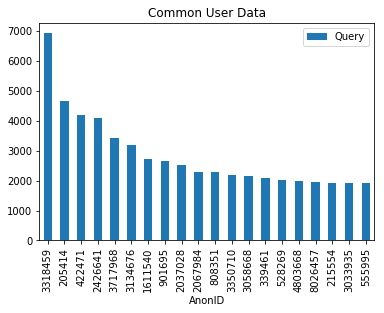

In [24]:
common_users = data.groupby(['AnonID'])['Query'].count().to_frame()
common_users= common_users.sort_values(by='Query', ascending=False)
common_users.head(20).plot(kind='bar')
plt.title('Common User Data')

### Most Search Query

Text(0.5, 1.0, 'Most Search Query')

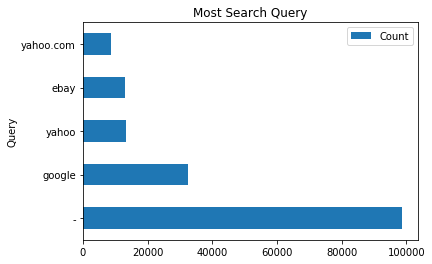

In [22]:
queries = data.Query
faq = pd.DataFrame({'Query': queries.value_counts().index, 'Count':queries.value_counts()})
faq.index = range(faq.shape[0])
f = faq.head()
f.index = f.Query
f = f[['Count']]
f.plot(kind = 'barh')
plt.title('Most Search Query')

### Count the Freq of URL

In [19]:
freq_url = data.groupby(['ClickURL'])['ClickURL'].count().to_frame()
freq_url['URL'] = list(freq_url.index)
freq_url['Count'] = freq_url['ClickURL']
freq_url= freq_url[['URL', 'Count']]
freq_url= freq_url.sort_values(by='Count', ascending=False)
freq_url = frequrl.reset_index(drop=True)
freq_url.head(10)

,URL,Count
0,google.com,36109
1,yahoo.com,16275
2,myspace.com,16063
3,en.wikipedia.org,12275
4,amazon.com,11039
5,imdb.com,9792
6,mapquest.com,9462
7,ebay.com,7613
8,mail.yahoo.com,4814
9,bankofamerica.com,4509


Text(0.5, 1.0, 'CommonURLS')

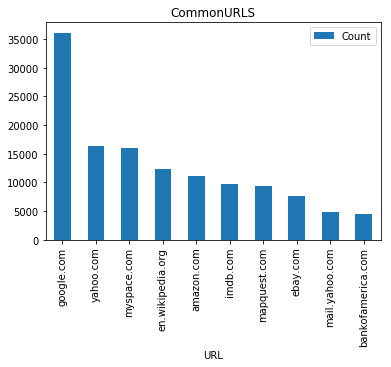

In [21]:
freq_url.index = freq_url.URL
freq_url.head(10).plot(kind='bar')
plt.title('CommonURLS')

### Daywise Request

Text(0.5, 1.0, 'Daywise Request')

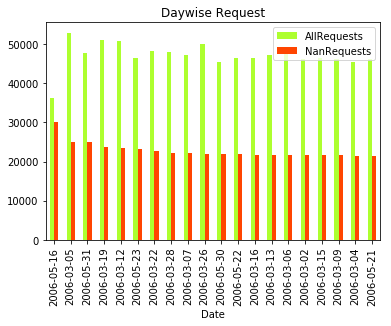

In [26]:
clickless = data[data.ClickURL.isnull()]
NaN_days = clickless.groupby(['QueryDay'])['AnonID'].count().to_frame()
all_days = data.groupby(['QueryDate'])['AnonID'].count().to_frame()
NaN_days['Date'] = list(NaN_days.index)
all_days['Date'] = list(all_days.index)
compDays = pd.merge(NaN_days, all_days, on='Date')
compDays['NanRequests'] = compDays['AnonID_x']
compDays['AllRequests'] = compDays['AnonID_y']
compDays = compDays[['Date', 'AllRequests','NanRequests']]
compDays = compDays.sort_values(by='NanRequests', ascending=False)
compDays.head(20).plot(x='Date', kind='bar', color=['greenyellow', 'orangered'])
plt.title('Daywise Request')

### High Rank Frequency (ItemRank)

Text(0.5, 1.0, 'Most Clicked Item Rank')

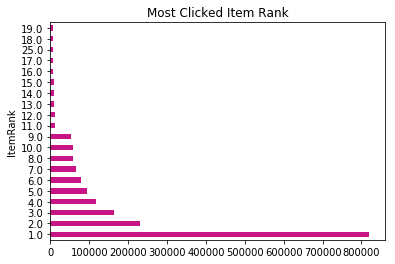

In [28]:
rankFreq = pd.DataFrame(data.groupby(['ItemRank'])['Query'].count())
rankFreq = rankFreq.sort_values(by='Query', ascending=False).head(20)
rankFreq.plot(kind = 'barh', color='mediumvioletred', legend=False)
plt.title('Most Clicked Item Rank')


### User's Analysis

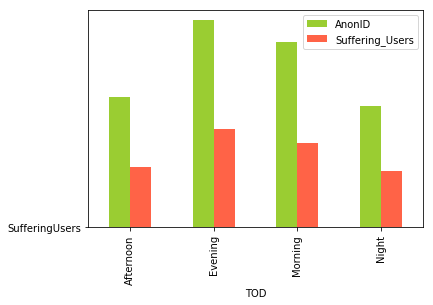

In [29]:
clickless = data[data.ClickURL.isnull()]
clickless['QueryTimeStamp'] = pd.to_datetime(clickless['QueryTime']).apply(lambda x: x.time())
clickless['TOD'] = clickless['QueryTimeStamp'].apply(lambda x: timeOfDay(x))

sufferingUsers = clickless.groupby(['TOD'])['AnonID'].count().to_frame()
timing = data.groupby(['TOD'])['AnonID'].count().to_frame()
timing['Suffering_Users'] = sufferingUsers.AnonID
timing.plot(kind='bar', color=['yellowgreen','tomato'])

### Non Click and Click Analysis

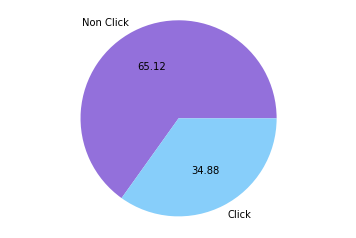

In [30]:
cleandata = data.dropna()
plt.figure()
values1 = [data.shape[0]/data.shape[0],cleandata.shape[0]/data.shape[0]] 
labels1 = ['Non Click', 'Click'] 
colors1 = ['mediumpurple','lightskyblue'] 
plt.pie(values1, labels=labels1, autopct='%.2f', colors=colors1)
plt.axis('equal')
plt.plot('NaNQueries.png')
plt.show()

In [31]:
from datetime import datetime, date
def time2date(x):
    return datetime.combine(date.today(), x)

### Statastics

In [32]:
newdmin = data.groupby(['AnonID','QueryDate'])['QueryTimeStamp'].min()
newdmax = data.groupby(['AnonID','QueryDate'])['QueryTimeStamp'].max()
ndmin = pd.DataFrame(newdmin)
ndmax = pd.DataFrame(newdmax)
ndmin['Min'] = ndmin['QueryTimeStamp']
ndmax['Max'] = ndmax['QueryTimeStamp']
ndmin = ndmin[['Min']]
ndmax = ndmax[['Max']]
newd = pd.concat([ndmax, ndmin], axis=1, join='inner')
newd['TimeSpent'] = newd['Max'].apply(time2date) - newd['Min'].apply(time2date)
pd.DataFrame(newd.TimeSpent.describe())

,TimeSpent
count,739530
mean,0 days 02:06:19.036314
std,0 days 04:30:29.945559
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:02:38
75%,0 days 01:18:07
max,0 days 23:59:39


## Classification Model

In [33]:
new_database = data[['Query','ClickURL']]

In [34]:
new_database.head()

,Query,ClickURL
0,family guy,NaN
1,also sprach zarathustra,NaN
2,family guy movie references,familyguyfiles.com
3,top grossing movies of all time,movieweb.com
4,top grossing movies of all time,imdb.com


In [35]:
new_database['labels'] = new_database['ClickURL'].notnull().astype('int')

In [41]:
new_database.head()
newdf = new_database[['Query','labels']]
newdf.dropna(inplace=True)
newdf = newdf[newdf['Query'] != '-']

In [61]:
newdf.head()

,Query,labels
0,family guy,0
1,also sprach zarathustra,0
2,family guy movie references,1
3,top grossing movies of all time,1
4,top grossing movies of all time,1


#### Classification 

In [79]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import re                  

[nltk_data] Downloading package punkt to /home/manotr/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [110]:
import string
stop_words = set(stopwords.words("english"))
def preprocess(text):
    filtered_tokens = []
    tokens = nltk.word_tokenize(text)
    without_stop_words = [word for word in tokens if not word in stop_words]
    for x in (without_stop_words): #this is Df_pd for Df_np (text[:])
        if re.search('[a-zA-Z]', x):
            filtered_tokens.append(x)
    new_txt = "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in filtered_tokens]).strip()
    return new_txt


In [111]:
newdf['Query1'] = newdf['Query'].apply(preprocess)

In [112]:
newdf.head()

,Query,labels,Query1
0,family guy,0,family guy
1,also sprach zarathustra,0,also sprach zarathustra
2,family guy movie references,1,family guy movie references
3,top grossing movies of all time,1,top grossing movies time
4,top grossing movies of all time,1,top grossing movies time


In [126]:
X = newdf.Query1
y = newdf.labels

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33,)
print("Total Size of Dataset : ", len(X))
print("Size of Trainig Set : ", X_train.shape)
print("Size of Test Set : ", X_test.shape)

Total Size of Dataset :  3515823
Size of Trainig Set :  (2355601,)
Size of Test Set :  (1160222,)


In [128]:
X_train_dtm = vect.transform(X_train)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [129]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
%time logreg.fit(X_train_dtm, y_train)

CPU times: user 10min 9s, sys: 9.34 s, total: 10min 18s
Wall time: 1min 43s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [130]:
y_pred_class = logreg.predict(X_test_dtm)

In [131]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.7084997526335477

In [132]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[322667, 208622],
       [129583, 499350]])

In [133]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.61      0.66    531289
           1       0.71      0.79      0.75    628933

   micro avg       0.71      0.71      0.71   1160222
   macro avg       0.71      0.70      0.70   1160222
weighted avg       0.71      0.71      0.71   1160222



## Clustering Algorithm

In [122]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm

In [117]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)

In [118]:
tfidf.fit(newdf.Query1)
text = tfidf.transform(newdf.Query1)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


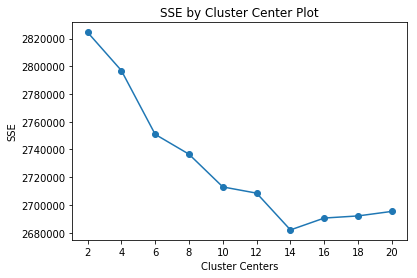

In [119]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [120]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

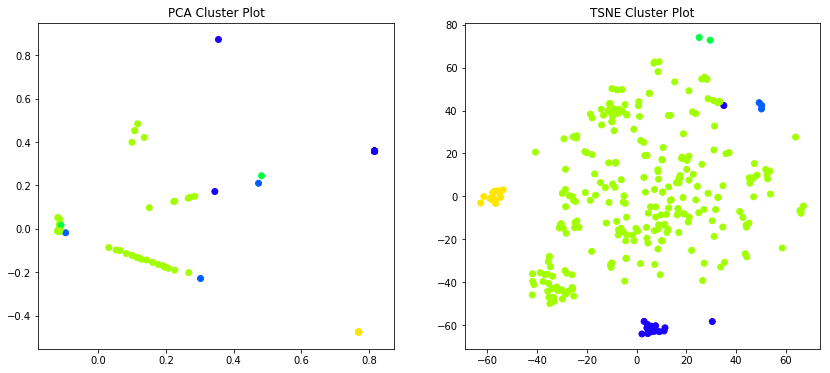

In [123]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)


In [ ]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        if i ==10:
            break
            
get_top_keywords(text, clusters, tfidf.get_feature_names(), 10)

#### K means Cluster

In [ ]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(text)

clusters = km.labels_.tolist()